<a href="https://colab.research.google.com/github/pierce-s/MAT-421/blob/main/Module_B_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student: Pierce Sarmiento

---

#**Module B** 
**17.4** Lagrange Polynomial Interpolation

**17.5** Newton's Polynomial Interpolation

---


**Section 17.4: Lagrange Polynomial Inteprolation**

*Summary:*

Rather than using a linear or cublic spline interpolation, we also have the option of using Lagrange polynomial interpolation. Instead of finding a cubic polynomial for each interval between our data points, we can find a single polynomial that passes through every data point. We do this by first calculating the Lagrange basis polynomials. For each given data point there is a basis polynomial that is $1$ at the data point, and $0$ at every other data point. This means that if we multiply a basis polynomial at $x_i$ by $y_i$, the polynomial will be equal to $y_i$ at $x_i$ and will be equal to $0$ at every other data point. Then, summing each of these scaled basis polynomials will result in a polynomial which passes through each data point.


---


*Implementation:*


First, let's write a function for the Lagrange basis polynomials using the provided equation in the book. 
>$P_{i}(x) = \prod_{j=1,j\neq i}^{n} \frac{x-x_j}{x_i-x_j}$



In [8]:
def lagrange_basis(i, x_data, x_point):
    result = 1
    for j, x_j in enumerate(x_data):
        if j == i:
            #skip this iteration if j == i
            continue
        result *= (x_point - x_j) / (x_data[i] - x_j)
    #Return the value of the i-th Lagrange basis polynomial at x_point
    return result

The `lagrange_basis` function takes in the index of the polynomial, the x value from our data points, and `x_point` refers to the interpolation point. The function then returns the value of $P_i(x)$ at `x_point`.

Here `x_data` and `y_data` refer to $x = [0, 1, 2]$ and $y = [1, 3, 2]$. All that is left to do now is plot the polynomials over a `np.linspace`.

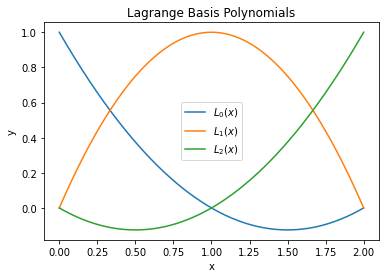

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = [0, 1, 2 ]
y = [1, 3, 2]
n = len(x)

#Plot each basis polynomial
x_values = np.linspace(min(x), max(x), 1000)
for i in range(n):
    #creates a list of y_values for each x_value (1000 points between 0 and 2)
    y_values = [lagrange_basis(i, x, x_value)for x_value in x_values]
    plt.plot(x_values, y_values, label=f"$L_{i}(x)$")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Lagrange Basis Polynomials")
plt.show()

We have successfully created polynomials which are equal to $1$ at their data point and $0$ at every other data point. In order for them to touch every data point we just need to scale the polynomials by their corresponding $y$ value.

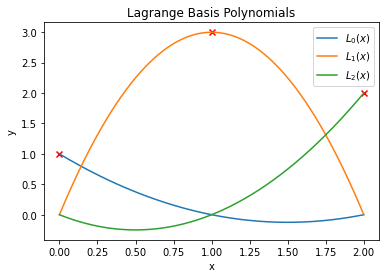

In [10]:
#Plot each basis polynomial, scaled by y[i]
x_values = np.linspace(min(x), max(x), 1000)
for i in range(n):
    #creates a list of y_values for each x_value (1000 points between 0 and 2)
    y_values = [lagrange_basis(i, x, x_value)*y[i] for x_value in x_values]
    plt.plot(x_values, y_values, label=f"$L_{i}(x)$")
    plt.legend()
    
#plot the data points as well
plt.scatter(x, y, color='red', marker='x')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Lagrange Basis Polynomials")
plt.show()

Now we see that each basis polynomial touches a data point, and is $0$ at every other data point. 

We can use the other given equation to calculate the Lagrange polynomial.
> $L(x) = \sum_{i=1}^n y_i P_i(x)$

In [11]:
def lagrange_interpolation(x_data, y_data, x_point):
    result = 0
    for i, y_i in enumerate(y_data):
        result += y_i * lagrange_basis(i, x_data, x_point)
    #Return the value of the Lagrange interpolating polynomial at x_point
    return result

Plotting the results of the Lagrange interpolation atop the basis polynomials shows the result of the summation of the basis polynomials.

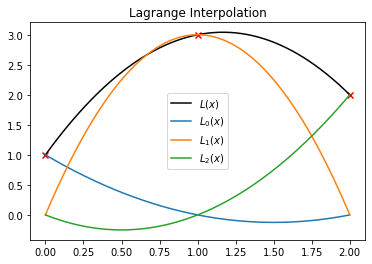

In [14]:
# Plot the Lagrange interpolating polynomial
x_values = np.linspace(min(x), max(x), 1000)
y_values = [lagrange_interpolation(x, y, x_value) for x_value in x_values]
plt.plot(x_values, y_values, 'k', label="$L(x)$")

#Plot each basis polynomial, scaled by y[i]
for i in range(n):
    #creates a list of y_values for each x_value (1000 points between 0 and 2)
    y_values = [lagrange_basis(i, x, x_value)*y[i] for x_value in x_values]
    plt.plot(x_values, y_values, label=f"$L_{i}(x)$")
    
#plot the data points as well
plt.scatter(x, y, color='red', marker='x')

plt.legend()
plt.title("Lagrange Interpolation")
plt.show()

**Section 17.5: Newton's Polynomial Interpolation**

*Summary:*

Newton's polynomial interpolation is another way to get an exact fit from our data points. The method works by computing *divided differences*, which are the differences between y-values of each data point. The differences are then used to find each polynomial, are used to approximate unknown data points. As each term is added together, the polynomial becomes increasingly accurate. The result is a function that passes through the every known data point. 

---


*Implementation:*

Using 
>$f(x) = \sum_{i=0}^n a_i n_i (x)$

and

>$n_i(x) = \prod_{j=0}^{i-1} (x - x_j)$

we can write a `newton_interpolation` function like the following:



In [15]:
def newton_interpolation(x_data, y_data, x):
    n = len(x_data)
    #create list which stores divided differences
    a = [y for y in y_data]
    
    #f(x)
    for j in range(1, n):
        #loop in descending order
        for i in range(n-1, j-1, -1):
            #calculate each divided difference
            a[i] = (a[i] - a[i-1]) / (x_data[i] - x_data[i-j])
    #n_i(x)
    result = a[n-1]
    for i in range(n-2, -1, -1):
        result = result * (x - x_data[i]) + a[i]
    return result

Then, we can plot the data points $x = [-5, -1, 0, 2]$ and $y = [-2, 6, 1, 3]$

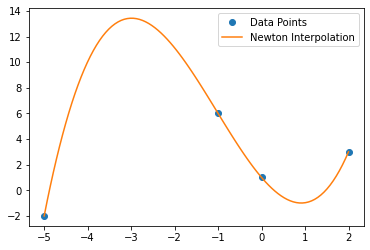

In [16]:
x_data = [-5, -1, 0, 2]
y_data = [-2, 6, 1, 3]

x = np.linspace(min(x_data), max(x_data), 100)
y = [newton_interpolation(x_data, y_data, i) for i in x]
plt.plot(x_data, y_data, 'o', label='Data Points')
plt.plot(x, y, '-', label='Newton Interpolation')
plt.legend()
plt.show()

In conclusion, we have demonstrated the implementation of Newton's Polynomial Interpolation method. The code computes the divided differences, which it used to find the polynomial that fits the given data points. The result is that we have an approximation at the unknown data points.